<a href="https://colab.research.google.com/github/rachitprojects/SoundSocial/blob/main/speech_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install SpeechRecognition

     |████████████████████████████████| 32.8 MB 1.2 MB/s 


In [1]:
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

--2022-04-02 18:11:03--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.1.208, 2607:f8b0:4004:83e::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.1.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: ‘speech_commands_v0.01.tar.gz’

speech_commands_v0. 100%[===================>]   1.39G   187MB/s    in 7.1s    

2022-04-02 18:11:10 (201 MB/s) - ‘speech_commands_v0.01.tar.gz’ saved [1489096277/1489096277]



In [2]:
!tar -xf speech_commands_v0.01.tar.gz

In [ ]:
!pip3 install wandb

# Experimenting with Librosa

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

In [ ]:
!pip3 install librosa

In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [10]:
signal, sr = librosa.load(librosa.util.example('brahms'))

In [24]:
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

n_fft = 2048
hop_length = 512
mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, 
 n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(8, 7))

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)

librosa.display.specshow(power_to_db, sr=sr, ax=ax, x_axis='time', y_axis='mel', cmap='magma', 
 hop_length=hop_length)
fig.savefig("fig.png")


<Figure size 576x504 with 0 Axes>

# Convert Data Set to Mel Spectrogram 
Will check for Bed , Bird , Eight, cat, happy. We sample 250 audio files out of the total. 

In [ ]:

import os

os.mkdir("bed_im")

for x in os.listdir("bed"):
    signal, sr = librosa.load("bed/" + x)
    n_fft = 2048
    hop_length = 512
    mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, 
    n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(8, 7))

    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)

    librosa.display.specshow(power_to_db, sr=sr, ax=ax, x_axis='time', y_axis='mel', cmap='magma', hop_length=hop_length)
    fig.savefig("bed_im/" + x[:-4] + ".png")


In [35]:
import random
import shutil

for x in random.sample(os.listdir("bed_im"), 250):
    original = "bed_im/" + x
    target = "bedmel/" + x
    shutil.copyfile(original, target)


Function to generate spectrograms

In [13]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


In [13]:
def gen_mel_spec(file, saveloc):
    signal, sr = librosa.load(file)
    n_fft = 2048
    hop_length = 512
    mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, 
    n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(8, 7))

    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)

    librosa.display.specshow(power_to_db, sr=sr, ax=ax, x_axis='time', y_axis='mel', cmap='magma', hop_length=hop_length)
    fig.savefig(saveloc)

def generate_sets(folder):
    os.mkdir(folder + "mel")
    for x in random.sample(os.listdir(folder), 250):
        gen_mel_spec(folder + "/" + x, folder + "mel" + "/" + x[:-4] + ".png")


In [ ]:
generate_sets("bed")
generate_sets("happy")
generate_sets("bird")
generate_sets("cat")
generate_sets("eight")

In [9]:
import cv2
import os

X = []
y = []

In [10]:

def load_set(folder, label):
    for x in os.listdir(folder):
        img = cv2.imread(folder + "/" + x)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X.append(img)
        y.append(label)

In [11]:
load_set("bedmel", 0)
load_set("birdmel", 1)
load_set("eightmel", 2)
load_set("catmel", 3)
load_set("happymel", 4)

1


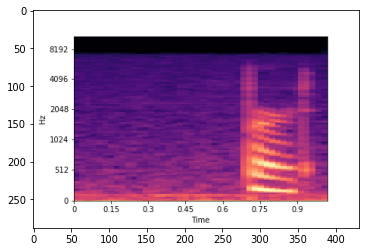

In [14]:
plt.imshow(X[332])
print(y[332])

In [37]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


Dont run this cell, it generates pickles for the existing dataset 

In [15]:
import numpy as np
import pickle

X = np.array(X)
y = np.array(y)

# os.mkdir("/content/gdrive/MyDrive/sound-melspec")

with open("/content/gdrive/MyDrive/sound-melspec/soundim.pickle", "wb") as soundset:
    pickle.dump(X, soundset)

with open("/content/gdrive/MyDrive/sound-melspec/soundlabel.pickle", "wb") as soundlabel:
    pickle.dump(y, soundlabel)


In [1]:
import pickle
import numpy as np

with open("/content/gdrive/MyDrive/sound-melspec/soundim.pickle", "rb") as soundim:
    X = pickle.load(soundim)

with open("/content/gdrive/MyDrive/sound-melspec/soundlabel.pickle", "rb") as soundlabel:
    y = pickle.load(soundlabel)


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = np.array(X)
y = np.array(y)
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


# Attempting to use Resnet 50

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM

from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(weights=None, input_shape=(288, 432, 3), classes=5)
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )


In [10]:

import tensorflow as tf

model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(288, 432, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax') 
]) 

model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )


In [11]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=5,
    verbose=1,
    validation_data=(X_test, y_test),
    batch_size=32,
)

Epoch 1/5
30/30 [==============================] - 102s 3s/step - loss: 29.8175 - accuracy: 0.2252 - val_loss: 1.6079 - val_accuracy: 0.2236
Epoch 2/5
30/30 [==============================] - 100s 3s/step - loss: 1.6053 - accuracy: 0.2060 - val_loss: 1.6045 - val_accuracy: 0.2332
Epoch 3/5
30/30 [==============================] - 104s 3s/step - loss: 1.5894 - accuracy: 0.2625 - val_loss: 1.5943 - val_accuracy: 0.3067
Epoch 4/5
30/30 [==============================] - 101s 3s/step - loss: 1.5569 - accuracy: 0.2700 - val_loss: 1.6052 - val_accuracy: 0.2300
Epoch 5/5
30/30 [==============================] - 100s 3s/step - loss: 1.5069 - accuracy: 0.3244 - val_loss: 1.6123 - val_accuracy: 0.2620


In [12]:
!cd /content/gdrive/MyDrive/

In [15]:
# Dont run this if already extsts
!mkdir  sound_weights

In [16]:
!cd sound_weights

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import os

name = "soundmel_learn"
checkpoint_path = "checkpoints/"+name+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

# save model after each epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1
)
tensorboard_callback = TensorBoard(
    log_dir='tensorboard_logs2/'+name,
    histogram_freq=1
)

model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test),
    batch_size=128,
    callbacks=[cp_callback, tensorboard_callback]
)


Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 1.4172 - accuracy: 0.3757 
Epoch 1: saving model to checkpoints/soundmel_learn/cp-0001.ckpt
INFO:tensorflow:Assets written to: checkpoints/soundmel_learn/cp-0001.ckpt/assets
8/8 [==============================] - 106s 13s/step - loss: 1.4172 - accuracy: 0.3757 - val_loss: 1.6514 - val_accuracy: 0.2652
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 1.3685 - accuracy: 0.4013 
Epoch 2: saving model to checkpoints/soundmel_learn/cp-0002.ckpt
INFO:tensorflow:Assets written to: checkpoints/soundmel_learn/cp-0002.ckpt/assets
8/8 [==============================] - 104s 13s/step - loss: 1.3685 - accuracy: 0.4013 - val_loss: 1.6511 - val_accuracy: 0.2620
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 1.3014 - accuracy: 0.4280 
Epoch 3: saving model to checkpoints/soundmel_learn/cp-0003.ckpt
INFO:tensorflow:Assets written to: checkpoints/soundmel_learn/cp-0003.ckpt/assets
8/8 [=================

In [19]:
name = "soundmel_learn2"
checkpoint_path = "checkpoints/"+name+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

# save model after each epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1
)
tensorboard_callback = TensorBoard(
    log_dir='tensorboard_logs2/'+name,
    histogram_freq=1
)

model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test),
    batch_size=128,
    callbacks=[cp_callback, tensorboard_callback]
)


Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.5226 - accuracy: 0.8154 
Epoch 1: saving model to checkpoints/soundmel_learn2/cp-0001.ckpt
INFO:tensorflow:Assets written to: checkpoints/soundmel_learn2/cp-0001.ckpt/assets
8/8 [==============================] - 109s 13s/step - loss: 0.5226 - accuracy: 0.8154 - val_loss: 3.1970 - val_accuracy: 0.3099
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.7033 - accuracy: 0.7471 
Epoch 2: saving model to checkpoints/soundmel_learn2/cp-0002.ckpt
INFO:tensorflow:Assets written to: checkpoints/soundmel_learn2/cp-0002.ckpt/assets
8/8 [==============================] - 104s 13s/step - loss: 0.7033 - accuracy: 0.7471 - val_loss: 2.5159 - val_accuracy: 0.2907
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.7257 
Epoch 3: saving model to checkpoints/soundmel_learn2/cp-0003.ckpt
INFO:tensorflow:Assets written to: checkpoints/soundmel_learn2/cp-0003.ckpt/assets
8/8 [===========

In [20]:
name = "soundmel_learn3"
checkpoint_path = "checkpoints/"+name+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

# save model after each epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1
)
tensorboard_callback = TensorBoard(
    log_dir='tensorboard_logs2/'+name,
    histogram_freq=1
)

model.fit(
    x=X_train,
    y=y_train,
    epochs=6,
    verbose=1,
    validation_data=(X_test, y_test),
    batch_size=64,
    callbacks=[cp_callback, tensorboard_callback]
)


Epoch 1/6
15/15 [==============================] - ETA: 0s - loss: 0.0626 - accuracy: 0.9861
Epoch 1: saving model to checkpoints/soundmel_learn3/cp-0001.ckpt
INFO:tensorflow:Assets written to: checkpoints/soundmel_learn3/cp-0001.ckpt/assets
15/15 [==============================] - 109s 7s/step - loss: 0.0626 - accuracy: 0.9861 - val_loss: 2.4649 - val_accuracy: 0.5719
Epoch 2/6
15/15 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9744
Epoch 2: saving model to checkpoints/soundmel_learn3/cp-0002.ckpt
INFO:tensorflow:Assets written to: checkpoints/soundmel_learn3/cp-0002.ckpt/assets
15/15 [==============================] - 110s 7s/step - loss: 0.0741 - accuracy: 0.9744 - val_loss: 2.2058 - val_accuracy: 0.5815
Epoch 3/6
15/15 [==============================] - ETA: 0s - loss: 0.0884 - accuracy: 0.9680
Epoch 3: saving model to checkpoints/soundmel_learn3/cp-0003.ckpt
INFO:tensorflow:Assets written to: checkpoints/soundmel_learn3/cp-0003.ckpt/assets
15/15 [=======